<a href="https://colab.research.google.com/github/FahimShahriarAnik/Data-Mining-EDA-on-Obesity-Dataset/blob/main/DM_EDA_Obesity_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of the dataset


# **Obesity Levels Based On Eating Habit**

Brief explanation of the **dataset**

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

Import Dataset and libraries

In [ ]:
import pandas as pd
%pip install ucimlrepo
# Load the dataset
from ucimlrepo import fetch_ucirepo
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) # data (as pandas dataframes)

df = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

2. Import and Inspect the Data

In [ ]:
# Basic inspection
print(f"Shape of the dataset: {df.shape}\n")  # Shape of the dataset
print(f"-------------------------------------\n Column names: {df.columns}\n")  # Column names
print(f"-------------------------------------\n Data types and null values: {df.info()}\n") # Data types and null values
print(f"-------------------------------------\n First 5 rows: {df.head()}\n")  # First 5 rows

Shape of the dataset: (2111, 16)

-------------------------------------
 Column names: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   f

3. Handle Missing Data


In [ ]:
# Checking for missing values
print(df.isnull().sum())
# Replace any known invalid entries with NA
df.replace('unknown', pd.NA, inplace=True)
# Drop rows with missing values
df_cleaned = df.dropna()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64


<ipython-input-4-6d1ef790305c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('unknown', pd.NA, inplace=True)


4. Explore Data Characteristics


In [ ]:
# Exploring Characteristics of numerical data
df['NObeyesdad']=y
numerical_columns = ['Age','Height','Weight','CH2O']
print(df[numerical_columns].describe())
print('\n----------------------------------------------------\n')
# Exploring Characteristics of categorical data
categorical_columns = ['Gender','family_history_with_overweight','NObeyesdad']
for column in categorical_columns:
  print(df[column].value_counts())
  print('\n')

               Age       Height       Weight         CH2O
count  2111.000000  2111.000000  2111.000000  2111.000000
mean     24.312600     1.701677    86.586058     2.008011
std       6.345968     0.093305    26.191172     0.612953
min      14.000000     1.450000    39.000000     1.000000
25%      19.947192     1.630000    65.473343     1.584812
50%      22.777890     1.700499    83.000000     2.000000
75%      26.000000     1.768464   107.430682     2.477420
max      61.000000     1.980000   173.000000     3.000000

----------------------------------------------------

Gender
Male      1068
Female    1043
Name: count, dtype: int64


family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64




5. Perform Data Transformation


In [ ]:
# Normalizing numerical variables like Age, Height, Weight
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['FAF', 'TUE', 'CH2O']] = scaler.fit_transform(df[['FAF', 'TUE', 'CH2O']])

6. Visualize Data Relationships


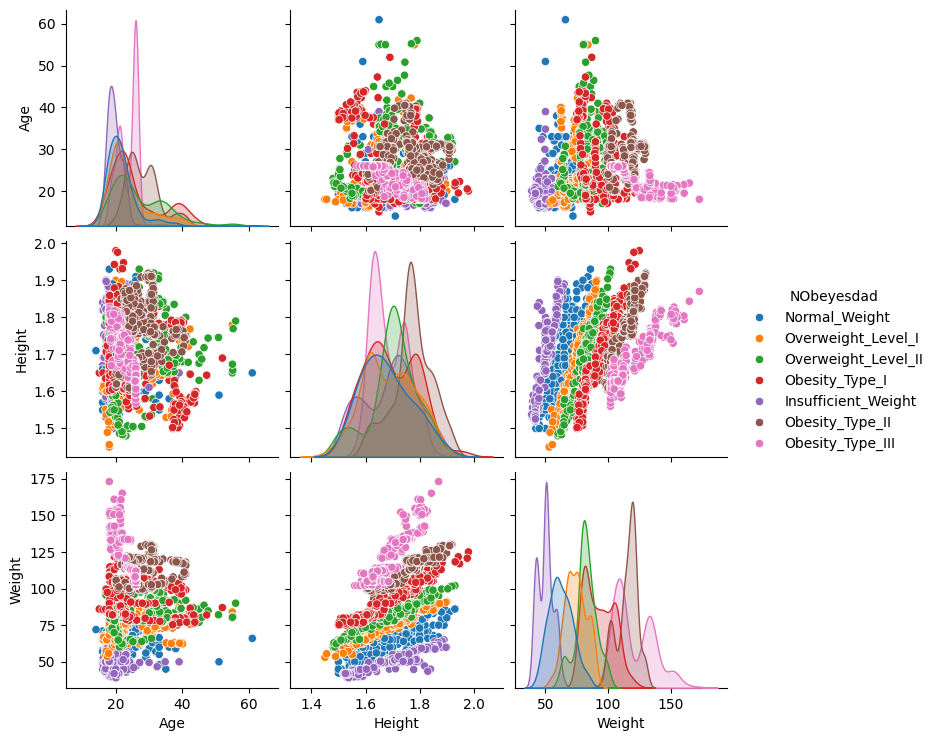

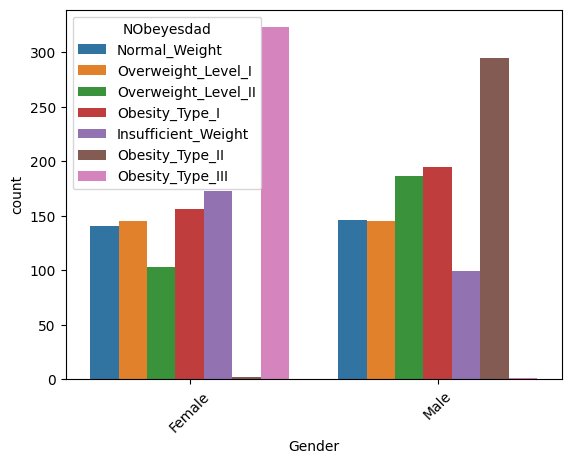

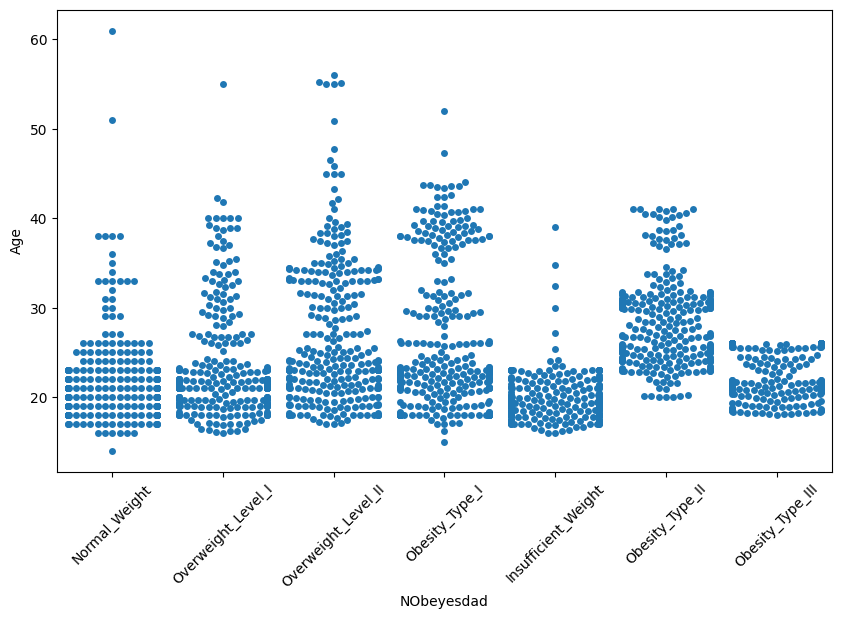

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Pair plot to visualize pairwise relationships between continuous variables and obesity levels
sns.pairplot(df, hue='NObeyesdad', diag_kind='kde', vars=['Age', 'Height', 'Weight'])
plt.show()
print('\n')
# Count plot of obesity levels by gender
sns.countplot(x='Gender', hue='NObeyesdad', data=df)
plt.xticks(rotation=45)
plt.show()
print('\n')
# Swarm plot to visualize data density of Age across Obesity Levels
plt.figure(figsize=(10,6))
sns.swarmplot(x='NObeyesdad', y='Age', data=df)
plt.xticks(rotation=45)
plt.show()
print('\n')


7. Handling Outliers


In [ ]:
from scipy import stats
import numpy as np

# Z-score method for outlier detection
z_scores = np.abs(stats.zscore(df[['Age', 'Height', 'Weight']]))  # Calculate z-scores for numerical columns
print(z_scores)

# Set threshold for outliers (commonly z > 3)
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

           Age    Height    Weight
0     0.522124  0.875589  0.862558
1     0.522124  1.947599  1.168077
2     0.206889  1.054029  0.366090
3     0.423582  1.054029  0.015808
4     0.364507  0.839627  0.122740
...        ...       ...       ...
2106  0.525774  0.097045  1.711763
2107  0.367195  0.502844  1.800914
2108  0.281909  0.541672  1.798868
2109  0.007776  0.404927  1.785780
2110  0.102119  0.398344  1.790592

[2111 rows x 3 columns]
